# Support Vector Machine Algorithm
Dataset: NOAA Reef Check Bleaching Data from Kaggle

Link: https://www.kaggle.com/datasets/oasisdata/noaa-reef-check-coral-bleaching-data

The dataset has been prepared beforehand and the CSV can be found at:

https://github.com/alyshapm/coral-reef-bleaching/blob/main/NOAA_ReefCheck/NOAA_int.csv

The dataset will be tested with different kernels of SVM and the results will be compared.

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Accessing the dataset
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/NOAA_ReefCheck/NOAA_int.csv'
df = pd.read_csv(url)
df.head()

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,0,Atlantic,2005,4.0,1,3,2,0,0,3,0,0
1,0,Red Sea,2004,6.0,0,3,1,0,0,1,0,0
2,0,Pacific,1998,3.0,0,1,0,0,0,0,1,0
3,0,Pacific,1998,10.0,0,1,0,0,0,0,1,0
4,0,Atlantic,1997,10.0,0,3,0,0,0,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9111 entries, 0 to 9110
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bleaching    9111 non-null   int64  
 1   Ocean        9111 non-null   object 
 2   Year         9111 non-null   int64  
 3   Depth        9111 non-null   float64
 4   Storms       9111 non-null   int64  
 5   HumanImpact  9111 non-null   int64  
 6   Siltation    9111 non-null   int64  
 7   Dynamite     9111 non-null   int64  
 8   Poison       9111 non-null   int64  
 9   Sewage       9111 non-null   int64  
 10  Industrial   9111 non-null   int64  
 11  Commercial   9111 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 854.3+ KB


# Testing Linear Kernel



In [4]:
# Setting the target and features for the SVM
target = df["Bleaching"]
features = df.drop(["Bleaching","Ocean","Year", "Depth"], axis=1)

# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 10)

In [5]:
# Building the SVM on the train data
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)
 
linear_prediction = linear_model.predict(X_test)

# Checking the accuracy for train and test data
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

# Checking the confusion matrix
print("Confusion Matrix:\n",confusion_matrix(linear_prediction, y_test))

print(classification_report(linear_prediction, y_test, zero_division=0))

Train score:  0.9727144425278345
Test score:  0.9703730797366495
Confusion Matrix:
 [[2653   81]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2734
           1       0.00      0.00      0.00         0

    accuracy                           0.97      2734
   macro avg       0.50      0.49      0.49      2734
weighted avg       1.00      0.97      0.98      2734



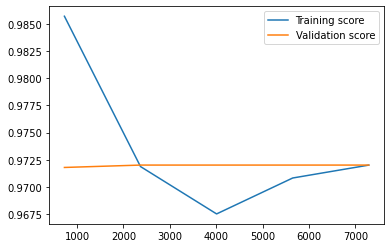

In [6]:
from sklearn.model_selection import learning_curve

# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(linear_model, features, target)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()

# Testing RBF Kernel

In [7]:
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

rbf_prediction = rbf_model.predict(X_test)

# Checking the accuracy for train and test data
print("Train score: ", rbf_model.score(X_train, y_train))
print("Test score: ", rbf_model.score(X_test, y_test))

# Checking the confusion matrix
print("Confusion Matrix:\n",confusion_matrix(rbf_prediction, y_test))

print(classification_report(rbf_prediction, y_test, zero_division=0))

Train score:  0.9738121373686687
Test score:  0.9707388441843453
Confusion Matrix:
 [[2653   80]
 [   0    1]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2733
           1       0.01      1.00      0.02         1

    accuracy                           0.97      2734
   macro avg       0.51      0.99      0.50      2734
weighted avg       1.00      0.97      0.98      2734



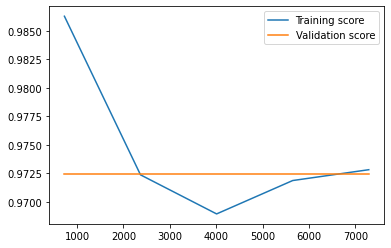

In [8]:
# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(rbf_model, features, target)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()

# Testing Polynomial Kernel

In [9]:
poly_model = SVC(kernel='poly')
poly_model.fit(X_train, y_train)

poly_prediction = poly_model.predict(X_test)

# Checking the accuracy for train and test data
print("Train score: ", poly_model.score(X_train, y_train))
print("Test score: ", poly_model.score(X_test, y_test))

# Checking the confusion matrix
print("Confusion Matrix:\n",confusion_matrix(poly_prediction, y_test))

print(classification_report(poly_prediction, y_test, zero_division=0))

Train score:  0.9744393915634311
Test score:  0.9703730797366495
Confusion Matrix:
 [[2652   80]
 [   1    1]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2732
           1       0.01      0.50      0.02         2

    accuracy                           0.97      2734
   macro avg       0.51      0.74      0.50      2734
weighted avg       1.00      0.97      0.98      2734



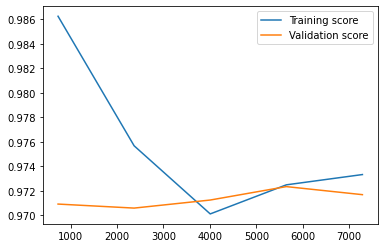

In [10]:
# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(poly_model, features, target)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()

# Testing Sigmoid Kernel

In [11]:
sigmoid_model = SVC(kernel='sigmoid')
sigmoid_model.fit(X_train, y_train)

sigmoid_prediction = sigmoid_model.predict(X_test)

# Checking the accuracy for train and test data
print("Train score: ", sigmoid_model.score(X_train, y_train))
print("Test score: ", sigmoid_model.score(X_test, y_test))

# Checking the confusion matrix
print("Confusion Matrix:\n",confusion_matrix(sigmoid_prediction, y_test))

print(classification_report(rbf_prediction, y_test, zero_division=0))

Train score:  0.9614238670221107
Test score:  0.9604974396488661
Confusion Matrix:
 [[2624   79]
 [  29    2]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2733
           1       0.01      1.00      0.02         1

    accuracy                           0.97      2734
   macro avg       0.51      0.99      0.50      2734
weighted avg       1.00      0.97      0.98      2734



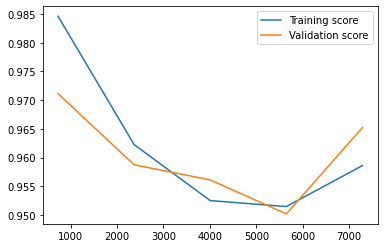

In [12]:
# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(sigmoid_model, features, target)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()

# Testing with only Poison
No dynamite is used as it is highly correlated with poison

In [14]:
# Setting the target and features for the SVM
target = df["Bleaching"]
features = df.drop(["Bleaching","Ocean","Year", "Depth", "Dynamite"], axis=1)

# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 10)

In [15]:
poly_model = SVC(kernel='poly')
poly_model.fit(X_train, y_train)

poly_prediction = poly_model.predict(X_test)

# Checking the accuracy for train and test data
print("Train score: ", poly_model.score(X_train, y_train))
print("Test score: ", poly_model.score(X_test, y_test))

# Checking the confusion matrix
print("Confusion Matrix:\n",confusion_matrix(poly_prediction, y_test))

print(classification_report(poly_prediction, y_test, zero_division=0))

Train score:  0.9730280696252156
Test score:  0.9703730797366495
Confusion Matrix:
 [[2653   81]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2734
           1       0.00      0.00      0.00         0

    accuracy                           0.97      2734
   macro avg       0.50      0.49      0.49      2734
weighted avg       1.00      0.97      0.98      2734



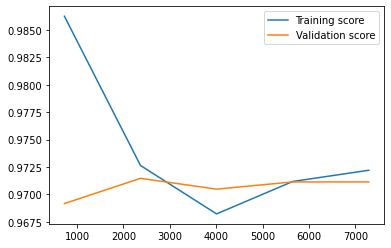

In [16]:
# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(poly_model, features, target)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()

# Testing only Dynamite
Dynamite and Poison are highly correlated to eachother

In [17]:
# Setting the target and features for the SVM
target = df["Bleaching"]
features = df.drop(["Bleaching","Ocean","Year", "Depth", "Poison"], axis=1)

# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 10)

In [18]:
poly_model = SVC(kernel='poly')
poly_model.fit(X_train, y_train)

poly_prediction = poly_model.predict(X_test)

# Checking the accuracy for train and test data
print("Train score: ", poly_model.score(X_train, y_train))
print("Test score: ", poly_model.score(X_test, y_test))

# Checking the confusion matrix
print("Confusion Matrix:\n",confusion_matrix(poly_prediction, y_test))

print(classification_report(poly_prediction, y_test, zero_division=0))

Train score:  0.9734985102712874
Test score:  0.9707388441843453
Confusion Matrix:
 [[2653   80]
 [   0    1]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2733
           1       0.01      1.00      0.02         1

    accuracy                           0.97      2734
   macro avg       0.51      0.99      0.50      2734
weighted avg       1.00      0.97      0.98      2734



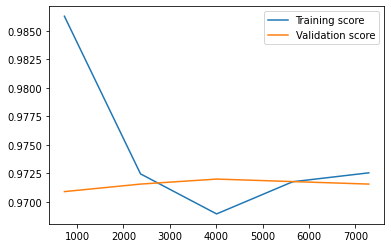

In [19]:
# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(poly_model, features, target)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()

# Observation
**Train Score:**
* Linear: 0.9727144425278345
* RBF: 0.9721459934138309
* Polynomial: 0.9744393915634311
* Sigmoid: 0.9614238670221107

**Test Score:**
* Linear: 0.9703730797366495
* RBF: 0.9707388441843453
* Polynomial: 0.9758639605046626
* Sigmoid: 0.9604974396488661
